<h1>IRIS Classification</h1>

In [1]:
import warnings 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
warnings.filterwarnings('ignore') 

In [2]:
dataset=pd.read_csv("IRIS.csv")
dataset.head(3)

sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
dataset.shape

(150, 5)

In [5]:
dataset["species"].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

<h3>Data Visualization</h3>

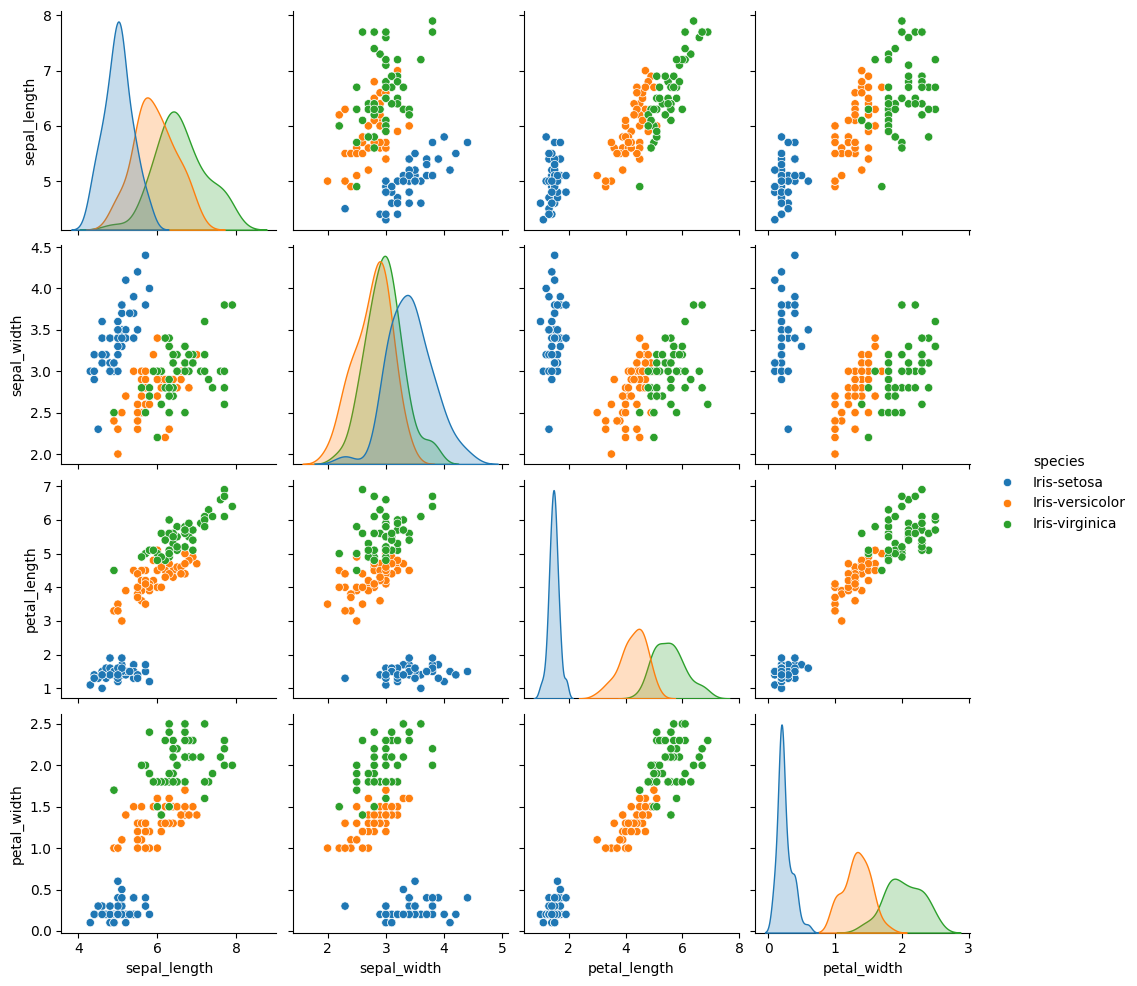

In [6]:
sns.pairplot(data=dataset,hue="species")
plt.show()

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()

<h3>Preprocessing</h3>

In [8]:
my_pipeline=Pipeline([
    ("onehot",OneHotEncoder())
])


In [9]:
dataset_tr=my_pipeline.fit_transform(dataset)

In [10]:
dataset_tr.shape

(150, 126)

<h3>Model Training</h3>

In [11]:
x=dataset.iloc[:,:-1]
y=dataset["species"]

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.4, random_state=42) 

In [14]:
dataset_tr=my_pipeline.fit_transform([y])

In [15]:
from sklearn.tree import DecisionTreeClassifier

In [16]:
model= DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [17]:
acc=model.score(x_test,y_test)*100 

<h3>Scores</h3>

In [18]:
from sklearn.metrics import confusion_matrix,f1_score,precision_score,recall_score

In [19]:
prd=model.predict(x_test)
prd_tr=my_pipeline.fit_transform([prd])
print("Precision Score:",precision_score(y_test,prd,average="weighted"))
print("Recall Score:",recall_score(y_test,prd,average="weighted"))
print("F1 Score:",f1_score(y_test,prd,average="weighted"))


Precision Score: 0.9666666666666667
Recall Score: 0.9666666666666667
F1 Score: 0.9666666666666667


In [20]:
cd=confusion_matrix(y_test,prd)

In [21]:
sns.heatmap(cd,annot=True)

<Axes: >

In [22]:
print("The accracy of given model is ",acc)

The accracy of given model is  96.66666666666667


<h3>Pickling of Model</h3>

In [23]:
import pickle

In [31]:
pickle.dump(model,open("IrisModel.pkl","wb"))

In [32]:
pickled_model=pickle.load(open("IrisModel.pkl","rb"))

In [33]:
pickled_model.predict([[5.1,3.4,1.4,0.2]])

array(['Iris-setosa'], dtype=object)